# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
# loading data for folder
data = pd.read_csv(
    "C:/Users/Eldred OFUA/Desktop/Data Science and Business Analytics PG Program/3. Supervised Learning/4. Project 3/used_device_data.csv"
)

<IPython.core.display.Javascript object>

## Data Overview

Checking Data Qualities

In [11]:
# checking the first 15 rows of the data frame to ensure correct loading of data
data.head(15)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


<IPython.core.display.Javascript object>

* The dataset contains information about phones, mainly andriod OS.
* Many of the phones seems to have a main camera of 13MP.
* Majority of the phones are 4G enabled.

In [58]:
# set up display area to show dataFrame in expanded view

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)


<IPython.core.display.Javascript object>

In [13]:
# checking the data types of the columns in the dataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

* There are 11 numeric (*float* and *int* type) and 4 string (*object* type) columns in the data
* The target variable is the normalized_used_price, which is of *float* type

In [9]:
# checking the shape of the dataset

data.shape

(3454, 15)

<IPython.core.display.Javascript object>

* The dataset contains information (15 attributes) about 3454 phones

### Statistical summary of the dataset

In [14]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

* We can see that the normalized used price vary between 1.53 and 6.62 euros
* The general normalized used price of phones is 4.36 euros

### Checking for duplicate values

In [15]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the data

### Checking for missing values

In [16]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

- There are missing values in the following columns: Main camera, selfie camera, internal memory, ram, battery and weight columns.

In [17]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [18]:
df.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


<IPython.core.display.Javascript object>

- Copy of dataset loaded correctly.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### 1. What does the distribution of normalized used device prices look like?

- Normalized used price distribution

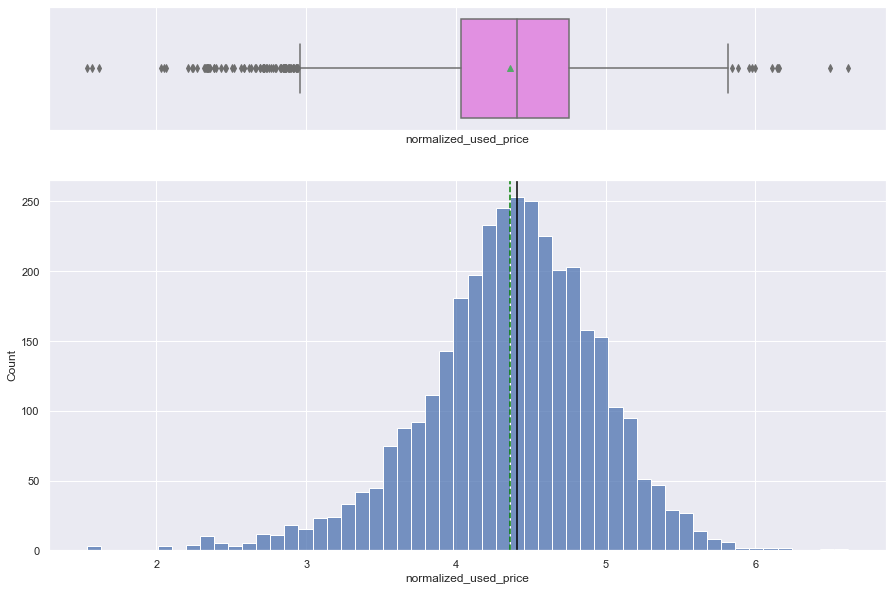

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "normalized_used_price")

- The chart of normalized used price follows a normal distribution.

#### 2. What percentage of the used device market is dominated by Android devices?

- Percentage of the market dominated by android used device

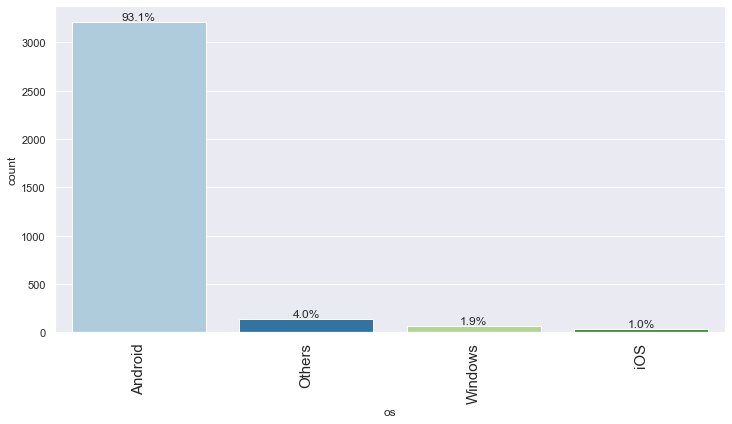

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "os", perc=True, n=10)

- 93.1% used device market is dominated by andriod devices.

#### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

- Below is a boxplot for ram vs brand name.

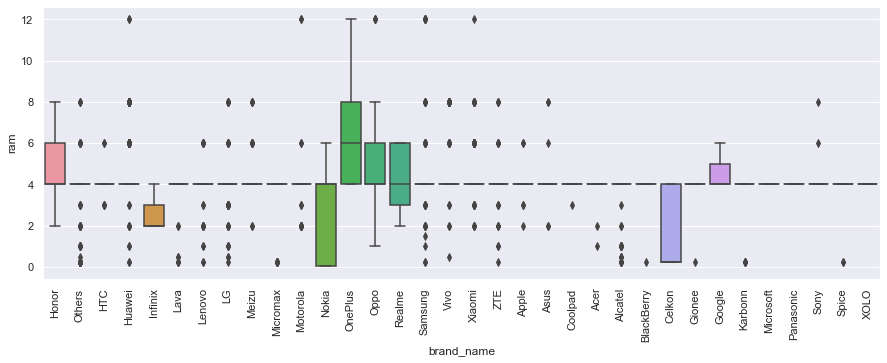

<IPython.core.display.Javascript object>

In [23]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

- Oneplus has the highest ram size, followed by Honor and Oppo.

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?



In [26]:
# First I create a dataframe for phones with battery greater than 4500mAh

df_battery_greater4500 = df[df.battery > 4500]
df_battery_greater4500.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001


<IPython.core.display.Javascript object>

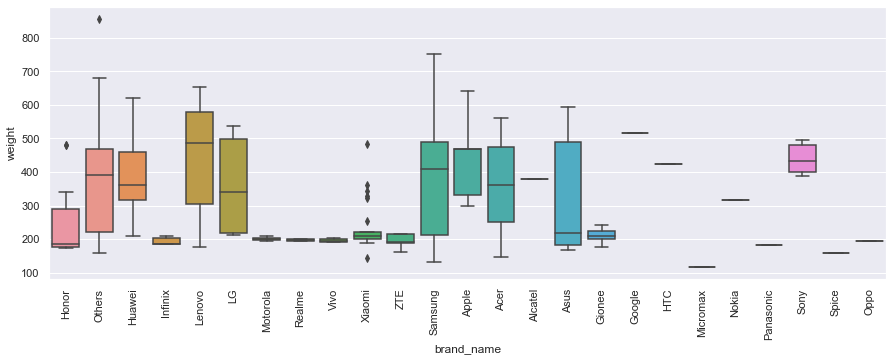

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=df_battery_greater4500, x="brand_name", y="weight"
)  ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

- Lenovo devices have an average weight of approx. 480 grams, followed by Samsung and Others. Micromax has the lowest weight of approx. 120 grams.

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?



In [31]:
# Converting 6 inches to centimeters, I will multiply 6 * 2.54 == 15.24cm

# creating a column for screen sizes larger than 15.24cm, I will use the code below:

df_screen_greater1524 = df[df.screen_size > 15.24]
df_screen_greater1524.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694


<IPython.core.display.Javascript object>

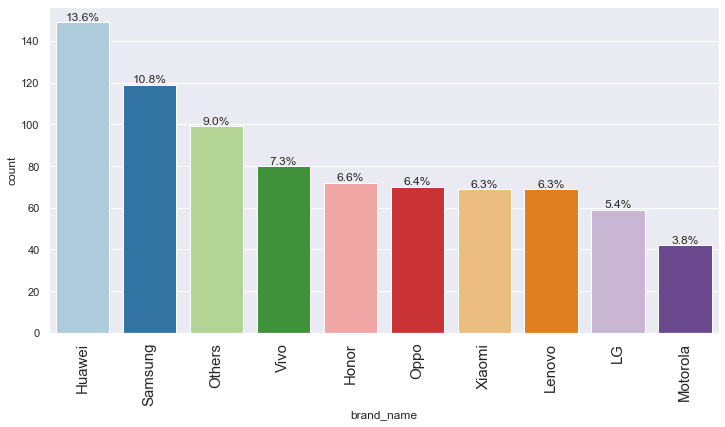

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df_screen_greater1524, "brand_name", perc=True, n=10)

In [33]:
df_screen_greater1524.shape

(1099, 15)

<IPython.core.display.Javascript object>

- There are 1099 phones that has screen size bigger than 6 inches.

#### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [34]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

<IPython.core.display.Javascript object>

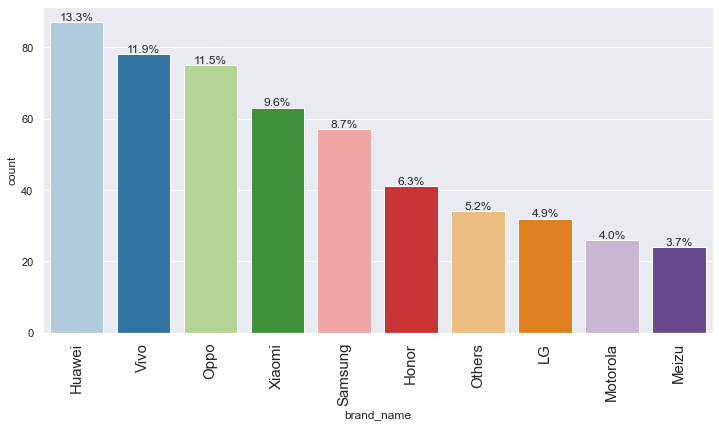

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=10)

- There are 655 devices that offer and selfie camera greater than 8MP.
- Huawei is leading with a value of 13.3% while Meizu is lagging with a value of 3.7%

#### 7. Which attributes are highly correlated with the normalized price of a used device?

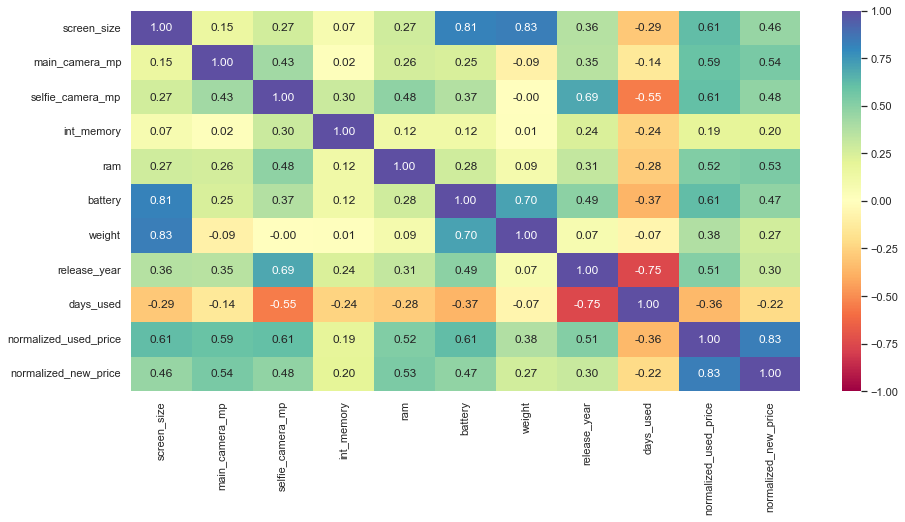

<IPython.core.display.Javascript object>

In [36]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- The following columns are highly correlated with normalized used price:
    - Normalized new price
    - Battery
    - Ram
    - Selfie camera
    - Main camera
    - Screen size

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

- We will impute the missing values in the data by the column medians grouped by `brand_name`.

In [37]:
# First I create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [38]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [39]:
# Inputing all the columns with missing data in a list.

cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name"])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [40]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median)

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

- There are currently no missing values again.

#### Feature engineering (if needed)

   - I will create a column for 'device_age' from 'release_year' column using 2021 as my stopping point.
   - Then I will drop the 'release_year' column.

In [43]:
df1["device_age"] = 2021 - df1["release_year"]
df1["device_age"].head()

0    1
1    1
2    1
3    1
4    1
Name: device_age, dtype: int64

<IPython.core.display.Javascript object>

#### Outlier detection and treatment (if needed)

- Let's check for outliers in the data

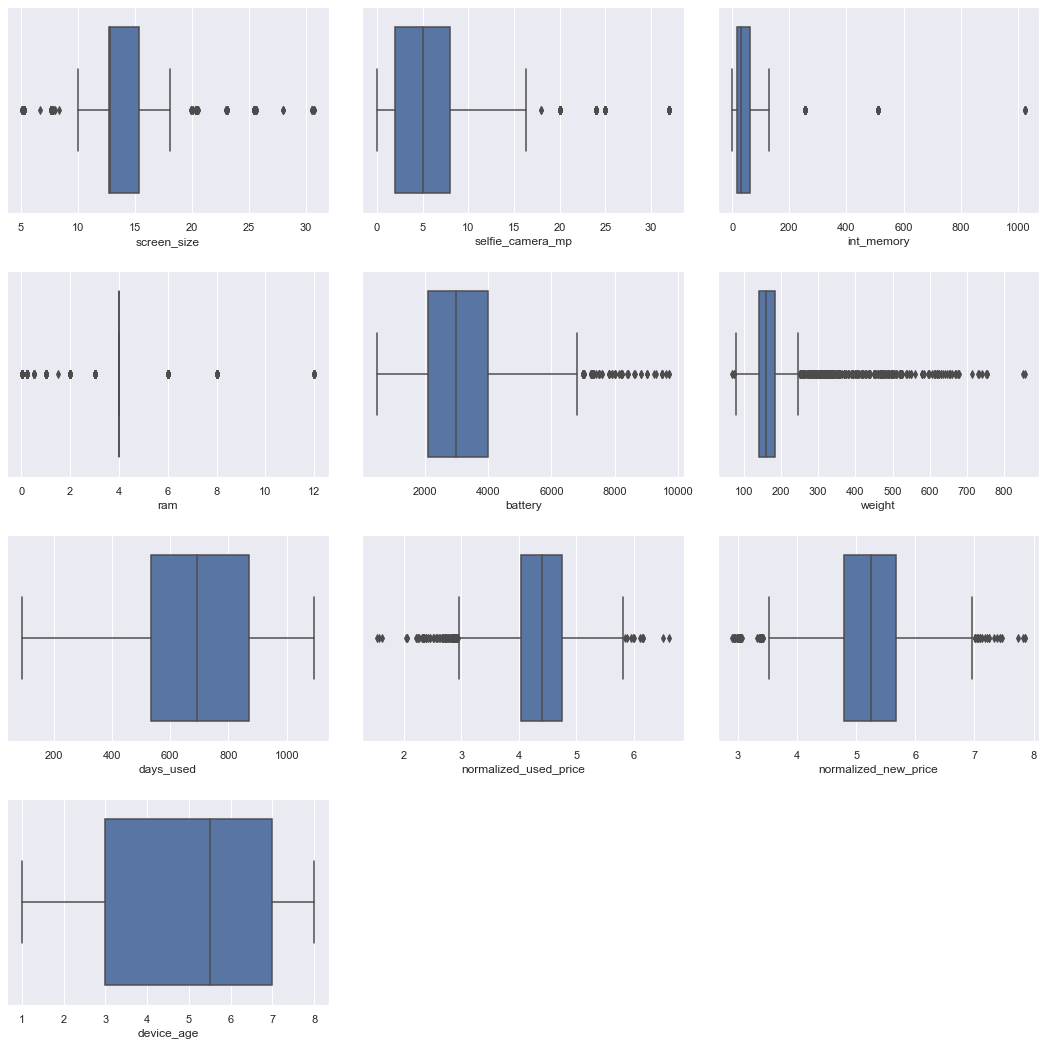

<IPython.core.display.Javascript object>

In [46]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are outliers in the data. Only days used and device age has no outliers.

#### Preparing data for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [47]:
# splitting the data into the dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  int_memory  ram  battery  weight  days_used  normalized_new_price  device_age
0      Honor  Android        14.50  yes   no           13.0               5.0        64.0  3.0   3020.0   146.0        127              4.715100           1
1      Honor  Android        17.30  yes  yes           13.0              16.0       128.0  8.0   4300.0   213.0        325              5.519018           1
2      Honor  Android        16.69  yes  yes           13.0               8.0       128.0  8.0   4200.0   213.0        162              5.884631           1
3      Honor  Android        25.50  yes  yes           13.0               8.0        64.0  6.0   7250.0   480.0        345              5.630961           1
4      Honor  Android        15.32  yes   no           13.0               8.0        64.0  3.0   5000.0   185.0        293              4.947837           1

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4

<IPython.core.display.Javascript object>

In [48]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [54]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()


,const,screen_size,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,device_age,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,main_camera_mp_8.0,main_camera_mp_5.0,main_camera_mp_10.5,main_camera_mp_3.15,"main_camera_mp_<bound method NDFrame._add_numeric_operations.<locals>.median of 0 13.0\n1 13.0\n2 13.0\n3 13.0\n4 13.0\n ... \n3449 13.0\n3450 13.0\n3451 13.0\n3452 13.0\n3453 13.0\nName: main_camera_mp, Length: 3454, dtype: float64>",main_camera_mp_2.0,main_camera_mp_16.0,main_camera_mp_0.3,main_camera_mp_12.0,main_camera_mp_14.5,main_camera_mp_48.0,main_camera_mp_3.0,main_camera_mp_21.0,main_camera_mp_1.3,main_camera_mp_13.1,main_camera_mp_24.0,main_camera_mp_0.08,main_camera_mp_20.7,main_camera_mp_23.0,main_camera_mp_1.0,main_camera_mp_18.0,main_camera_mp_12.2,main_camera_mp_12.3,main_camera_mp_20.0,main_camera_mp_20.2,main_camera_mp_4.0,main_camera_mp_12.5,main_camera_mp_10.0,main_camera_mp_6.5,main_camera_mp_6.7,main_camera_mp_41.0,main_camera_mp_20.1,main_camera_mp_12.6,main_camera_mp_16.3,main_camera_mp_22.6,main_camera_mp_19.0,main_camera_mp_21.5,main_camera_mp_21.2,main_camera_mp_8.1,main_camera_mp_1.2,main_camera_mp_22.5
0,1.0,14.50,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,17.30,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,16.69,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,25.50,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,15.32,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [55]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [56]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

####  screen size

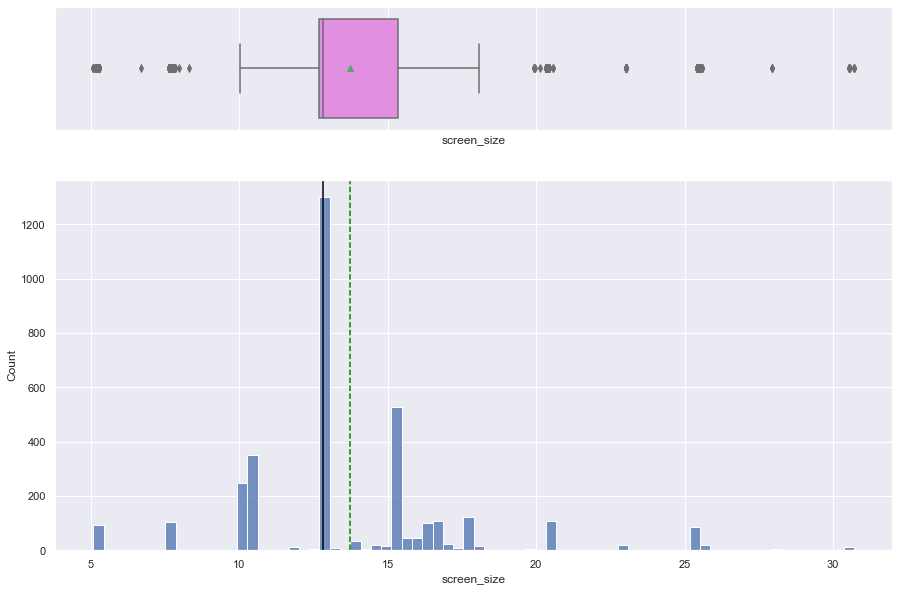

<IPython.core.display.Javascript object>

In [90]:
histogram_boxplot(df1, "screen_size")

* The screen size distribution is slightly right skewed. Most of the phone screen sizes are 5.0 inches.

#### internal memory

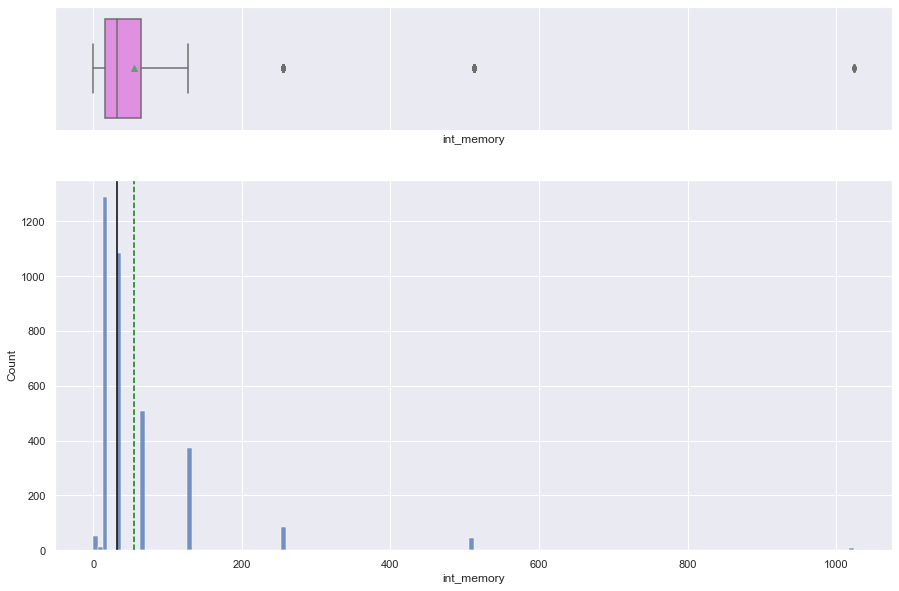

<IPython.core.display.Javascript object>

In [92]:
histogram_boxplot(df1, "int_memory")

* The internal memory distribution is highly right skewed. Most of the internal memory sizes are falls between 32GB to 64GB

#### ram

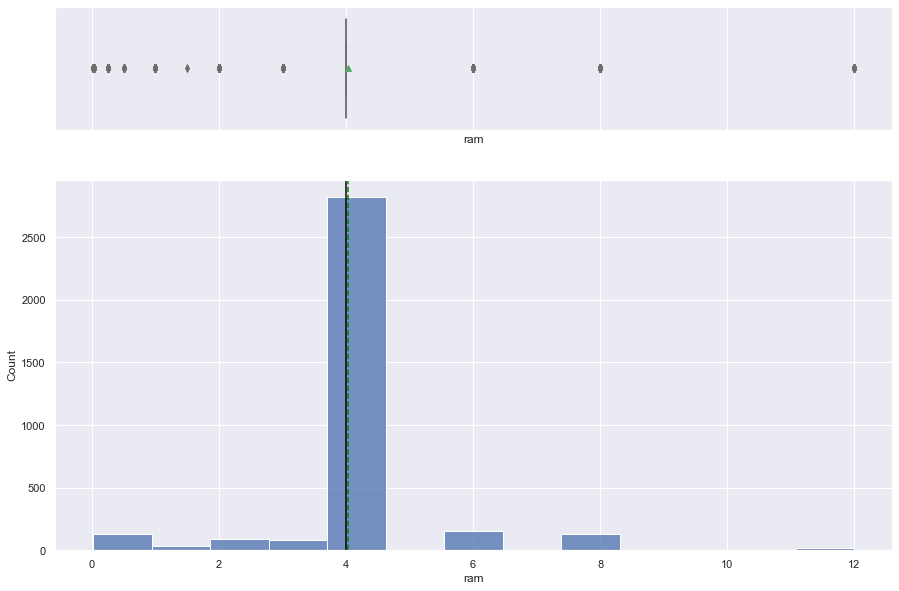

<IPython.core.display.Javascript object>

In [93]:
histogram_boxplot(df1, "ram")

* The ram distribution is a normal distribution. Most of the ram sizes is 4GB.

## Model Building - Linear Regression

In [59]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.850
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     159.2
Date:                   Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:57:21   Log-Likelihood:                 164.10
No. Observations:                   2417   AIC:                            -160.2
Df Residuals:                       2333   BIC:                             326.2
Df Model:                             83                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

<IPython.core.display.Javascript object>

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.845**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.6815**


## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [60]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [61]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226088,0.177331,0.849966,0.844228,4.247228


<IPython.core.display.Javascript object>

In [62]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(
    olsmodel1, x_test, y_test
)  ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239468,0.185398,0.841008,0.826066,4.500184


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.85, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalized_used_price within a mean error of 0.19 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized_used_price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### TEST FOR MULTICOLLINEARITY

We will test for multicollinearity using VIF.

- General Rule of thumb:

- If VIF is 1 then there is no correlation between the  𝑘 th predictor and the remaining predictor variables.
- If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
- If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [64]:
# Let's define a function to check VIF.


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [65]:
pd.set_option("display.max_rows", 500)

<IPython.core.display.Javascript object>

In [66]:
checking_vif(x_train)

C:\Users\Eldred OFUA\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Eldred OFUA\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,293.682791
1,screen_size,8.072380
2,selfie_camera_mp,2.896533
3,int_memory,1.433539
4,ram,2.350633
5,battery,4.285777
6,weight,6.972278
7,days_used,2.750913
8,normalized_new_price,3.464011
9,device_age,5.259652


<IPython.core.display.Javascript object>

#### To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [67]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [70]:
col_list = ["screen_size"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.841562,0.232382


<IPython.core.display.Javascript object>

In [71]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

C:\Users\Eldred OFUA\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Eldred OFUA\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF after dropping  screen_size


,feature,VIF
0,const,261.112888
1,selfie_camera_mp,2.890950
2,int_memory,1.433105
3,ram,2.350162
4,battery,4.072776
5,weight,3.274390
6,days_used,2.742081
7,normalized_new_price,3.429413
8,device_age,5.067186
9,brand_name_Alcatel,3.435998


<IPython.core.display.Javascript object>

* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [72]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     157.5
Date:                   Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                           16:25:51   Log-Likelihood:                 139.96
No. Observations:                   2417   AIC:                            -113.9
Df Residuals:                       2334   BIC:                             366.7
Df Model:                             82                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

<IPython.core.display.Javascript object>

#### Interpreting the Regression Results:

4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).


**Observations**

- We can see that adj. R-squared has dropped from 0.845 to 0.842, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

#### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [73]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'device_age', 'brand_name_Nokia', 'brand_name_Samsung', 'brand_name_Xiaomi', 'os_Others', '4g_yes', 'main_camera_mp_8.0', 'main_camera_mp_5.0', 'main_camera_mp_3.15', 'main_camera_mp_2.0', 'main_camera_mp_16.0', 'main_camera_mp_0.3', 'main_camera_mp_48.0', 'main_camera_mp_1.3', 'main_camera_mp_0.08', 'main_camera_mp_23.0', 'main_camera_mp_4.0', 'main_camera_mp_6.7']


<IPython.core.display.Javascript object>

In [75]:
x_train3 = x_train2[selected_features]

x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [76]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     585.8
Date:                   Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                           16:39:13   Log-Likelihood:                 111.79
No. Observations:                   2417   AIC:                            -177.6
Df Residuals:                       2394   BIC:                            -44.41
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231034,0.180656,0.84333,0.841824,4.326668


<IPython.core.display.Javascript object>

In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241582,0.187423,0.838189,0.834515,4.545072


<IPython.core.display.Javascript object>

**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.842, i.e., our model is able to explain ~84.2% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.842, this shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [79]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.884290,0.203197
1525,4.448399,4.603843,-0.155444
1128,4.315353,4.308518,0.006834
3003,4.282068,4.190476,0.091592
2907,4.456438,4.505063,-0.048625


<IPython.core.display.Javascript object>

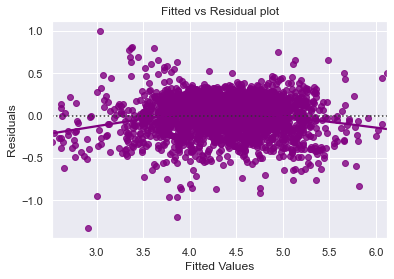

<IPython.core.display.Javascript object>

In [80]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

#### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

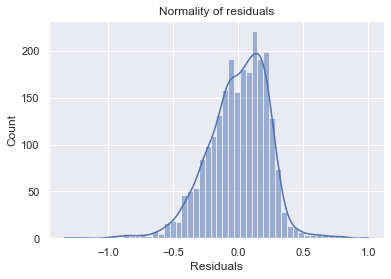

<IPython.core.display.Javascript object>

In [81]:
# plotting the distribution of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

- The histogram of residuals almost has a bell shape structure.
- Let's check the Q-Q plot.

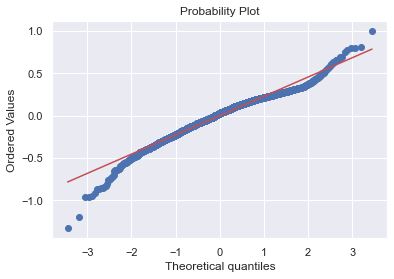

<IPython.core.display.Javascript object>

In [82]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
## Complete the code check Q-Q plot
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [83]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9726455211639404, pvalue=4.2932652885741155e-21)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

#### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [84]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0599292349664002), ('p-value', 0.15818744298274198)]

<IPython.core.display.Javascript object>

**Observations**

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

#### Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [85]:
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.429868
2341,3.696103,4.020501
1913,3.592093,3.660868
688,4.306495,4.108012
650,4.522115,5.178772
2291,4.259294,4.404164
40,4.997685,5.439308
1884,3.875359,4.062270
2538,4.206631,4.026244
45,5.380450,5.254737


<IPython.core.display.Javascript object>

### Final Model

In [86]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

<IPython.core.display.Javascript object>

In [87]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     585.8
Date:                   Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                           20:25:14   Log-Likelihood:                 111.79
No. Observations:                   2417   AIC:                            -177.6
Df Residuals:                       2394   BIC:                            -44.41
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [88]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231034,0.180656,0.84333,0.841824,4.326668


<IPython.core.display.Javascript object>

In [89]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241582,0.187423,0.838189,0.834515,4.545072


<IPython.core.display.Javascript object>

* The model is able to explain ~83.4% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.54% of the normalized price of used devices.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

- A unit increase in Selfie camera (`selfie_camera_mp`) increases the median normalized used price by 0.0148 unit, all other variables held constant.
- A unit increase in ram (`ram`) increases the median normalized used price by 0.0172 unit, all other variables held constant.
- A unit increase in weight (`weight`) increases the median normalized used price by 0.0017 unit, all other variables held constant.
- A unit increase in normalized new price (`normalized_used_price`) increases the median normalized used price by 0.4141 units, all other variables held constant.
- A unit increase in device age (`device_age`) increases the median normalized used price by 0.0242 units, all other variables held constant.
- A unit increase in 4g network accessibility (`4g_yes`) increases the midian normalized used price by 0.0396 units, all other variables held constant.
- Phones with higher main cameras sizes (>= 23MP)will have 0.222 unit higher median normalized used price compared to phones with lower main camera sizes.
- ReCell can gather more data about the customers like age, gender, geographical location, occupation, etc. to better understand the demographics of the purchasers of used phone devices, so as to better streamline their target audience.

___